<a href="https://colab.research.google.com/github/HanzlaJavaid/Brain-Computing-Interface/blob/main/BCI_Mindwave_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/tutorial_tea.csv")
df = df.iloc[:,1:]
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,16012.0,5158.167625,1358.138283,1676.412424,1882.066858,2202.467613,1272.160783,734.850870,331.862516,198.052753,696.073028,970.093078,306.973953,9.149336,658.141069,109.337983,42.571836,112.579166,120.086463,345.767644,155.397555,282.516594,110.389618,107.748964,11.886390,158.200073,103.671374,7.727774,30.947365,160.207936,211.593657,151.647532,100.655710,424.054657,140.825146,225.448242,396.298305,68.176665,146.435005,46.630932,28.135560,206.549732,73.308985,93.130547,88.954509,52.648380,98.530211,16.061144,245.102231,514.048104,0.0
1,6788.0,2224.451905,4541.447190,3742.328003,2063.413918,1977.750850,1415.344430,645.290676,117.917392,132.659579,288.107151,548.699066,147.012275,424.110076,131.403754,296.043991,124.748233,376.682546,20.473376,597.585640,72.442188,292.887935,78.331788,302.756701,57.665251,99.742646,517.997283,669.982130,300.245178,362.974566,116.914360,384.104897,161.858512,235.864994,7.459938,213.174930,134.900182,2.409028,42.517165,137.881555,116.679846,236.657087,451.809030,303.561664,39.015914,146.416672,55.955417,172.647081,40.618273,108.145779,0.0
2,9272.0,120.115136,2363.854224,59.369315,1315.529029,481.141249,1411.538070,274.888370,64.773787,609.562067,548.454255,1091.531149,71.772839,265.238218,584.069878,381.195172,319.767010,282.657895,237.870968,126.045130,713.668697,42.735356,240.455569,536.362139,101.525651,146.668144,309.377956,428.687655,471.546141,240.828871,732.817304,286.535538,131.249907,365.661257,311.256377,157.682823,9.296058,388.713405,225.082281,42.304804,91.144718,144.744280,262.298233,145.569071,513.914325,189.985134,255.929089,115.516443,46.674171,34.515031,1.0
3,11937.0,1462.657881,5498.463048,3166.211035,1456.365380,2389.938419,803.757239,866.116937,282.172349,74.710203,671.572094,1104.417439,277.970037,396.101015,185.671292,941.189839,64.584257,238.798902,624.277252,293.310954,97.771741,529.684838,251.157826,49.538034,362.909701,230.814042,49.176785,69.023859,94.219369,388.084379,61.093848,143.103710,10.792987,268.004441,143.006227,135.032046,200.224245,282.594661,473.683973,365.700368,191.143295,312.366200,151.371060,1.849036,272.119940,38.774247,217.341544,146.652036,309.220736,10.248949,0.0
4,12308.0,3747.589838,3152.813817,687.188643,813.248289,1930.596436,264.622849,770.099468,1040.324188,202.110647,181.775718,142.891296,265.910529,494.296358,57.021185,6.369315,415.754597,49.874050,22.126537,73.930462,61.762386,384.210047,208.315633,262.944028,149.715756,65.850037,57.013127,142.613148,207.050604,46.952873,49.914004,73.566321,133.988306,143.271643,112.074746,18.510864,181.592092,98.095307,471.731885,209.992420,245.101545,288.261371,229.557392,190.675105,56.272391,179.091377,39.061506,223.933504,106.239786,172.667684,0.0


In [4]:
df['50'].value_counts()

0.0    1225
1.0    1219
Name: 50, dtype: int64

In [5]:
X = df.values[:,:-1]
y = df.values[:,-1]

In [6]:
St = StandardScaler()
St.fit(X)
X = St.transform(X)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1955, 50)
(1955,)
(489, 50)
(489,)


In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256,input_shape=(50,),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [9]:
model.summary()
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               13056     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [10]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
62/62 [==============================] - 4s 9ms/step - loss: 0.6437 - accuracy: 0.6246 - val_loss: 0.6062 - val_accuracy: 0.7689
Epoch 2/50
62/62 [==============================] - 0s 7ms/step - loss: 0.5462 - accuracy: 0.7509 - val_loss: 0.5855 - val_accuracy: 0.7526
Epoch 3/50
62/62 [==============================] - 0s 7ms/step - loss: 0.5143 - accuracy: 0.7770 - val_loss: 0.5409 - val_accuracy: 0.7669
Epoch 4/50
62/62 [==============================] - 0s 6ms/step - loss: 0.4794 - accuracy: 0.7749 - val_loss: 0.5147 - val_accuracy: 0.7587
Epoch 5/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4547 - accuracy: 0.7903 - val_loss: 0.5106 - val_accuracy: 0.7751
Epoch 6/50
62/62 [==============================] - 0s 7ms/step - loss: 0.4327 - accuracy: 0.8005 - val_loss: 0.4982 - val_accuracy: 0.7730
Epoch 7/50
62/62 [==============================] - 0s 6ms/step - loss: 0.4163 - accuracy: 0.8199 - val_loss: 0.5024 - val_accuracy: 0.7751
Epoch 8/50
62/62 [==

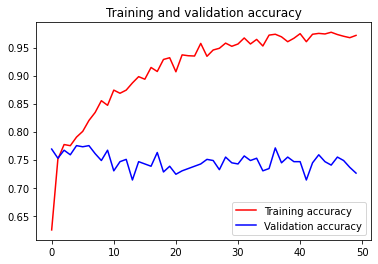

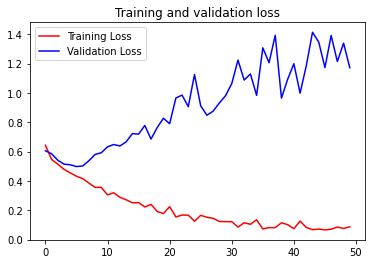

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
df_t = pd.read_csv("/content/drive/MyDrive/TEST_STUDYING.csv")
df_t = df_t.iloc[:,1:]
df_t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,8859.0,935.688076,2328.895462,2758.556165,658.556168,655.415908,142.754535,249.328991,609.282673,390.448596,133.616583,455.096843,107.139680,157.366741,273.158806,783.925090,942.358275,547.683140,153.050996,583.253647,248.336211,290.288771,169.702732,572.699918,173.195146,565.596155,162.693323,497.478695,46.349128,156.919000,105.684089,3.815057,304.478410,18.711667,504.299753,426.955993,165.662670,105.116276,145.955207,127.011945,80.525653,705.802894,247.390769,16.284674,65.008067,629.568838,110.545697,279.834377,86.923772,9.883943,1.0
1,3563.0,326.364929,3.337613,1003.801222,56.638661,674.818439,180.205567,40.846513,759.751015,222.555366,14.176693,814.988738,162.743753,403.995622,18.896791,26.594115,372.660050,45.102367,55.244692,230.386358,315.596038,74.430445,10.868542,240.565696,67.100736,245.889504,100.877241,127.921505,176.650479,400.564481,144.482421,144.323193,54.169272,217.068403,336.763505,459.968927,509.290455,127.907002,203.490329,163.443892,111.216574,64.266916,51.017662,244.807608,324.981301,327.258805,102.335187,398.014962,276.259551,299.942769,1.0
2,5929.0,121.433673,634.827086,1061.634377,1280.740566,120.748477,622.414717,631.651312,380.220253,262.928897,675.380658,297.107493,214.908219,505.593018,519.913110,158.594389,78.703941,352.208083,371.741347,302.820475,936.959668,564.449124,389.605288,68.943156,156.482965,316.406724,16.102821,133.595923,411.091616,304.699554,142.485271,335.823510,83.009700,74.058617,124.232715,217.836717,10.757650,104.516020,63.326204,614.816359,146.604868,2.984570,454.641743,113.269638,234.341880,407.141293,68.827957,380.452593,427.780888,189.061637,1.0
3,7844.0,704.653607,833.951936,77.716421,171.730232,319.723684,749.975291,244.559454,666.386030,745.665560,64.202630,374.166460,759.462069,258.797845,210.214571,178.389058,458.374275,152.774151,355.835188,140.184191,34.548685,10.080651,253.975443,123.367751,280.739153,356.580487,292.726467,69.473601,18.290071,107.485965,142.690836,306.795103,376.225015,439.203458,226.985227,211.502998,301.537596,149.638666,99.568380,271.866133,500.657651,436.463130,318.717023,170.216323,579.921218,603.182305,27.238255,113.721815,280.086010,54.149085,1.0
4,8953.0,1630.042848,1092.504290,1172.734575,14.746686,260.062344,233.971014,721.148536,80.644230,78.039903,894.698997,206.277121,557.669055,158.288191,87.718785,411.582983,87.868197,92.995082,262.766219,410.583086,124.328517,302.350739,23.314419,58.701798,122.126770,189.674722,250.153028,271.778851,350.155998,141.741847,59.005818,174.371420,33.281343,89.561589,106.694109,212.795097,338.443783,481.989607,36.976898,649.940388,217.408830,153.521206,23.067965,181.209695,205.794021,32.128470,595.439260,220.949021,198.821365,23.322241,1.0


In [25]:
X_test = df_t.values[:,:-1]

In [26]:
x_test = St.transform(X_test)

In [27]:
y_test = df_t.values[:,-1]

In [29]:
model.evaluate(x_test,y_test)

12/12 [==============================] - 0s 3ms/step - loss: 2.1402 - accuracy: 0.3989


[2.1402318477630615, 0.39889195561408997]